## Unsupervised Machine Learning

### This script contains the following:

#### 1. Importing libraries and data
#### 2. Preprocessing Data
#### 3. The elbow technique
#### 4. k-means clustering

### 1. Importing libraries and data and renaming columns

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import pylab as pl 

In [6]:
# Show plots directly in the Jupyter notebook

%matplotlib inline

# Column display options

pd.options.display.max_columns = 50

In [7]:
# declare a data path and import data

data_path = r'C:\Users\gerar\CareerFoundry Python\Spotify charts streaming analysis'

df_spotify = pd.read_csv(os.path.join(data_path, '02 Data', 'Prepared Data', 'spotify_clean_global_unique.csv'))

df_spotify.sample(n=5)
                

                                    

,Unnamed: 0,uri,artist_names,artists_num,artist_individual,artist_id,artist_genre,collab,track_name,album_num_tracks,peak_rank,weeks_on_chart,streams,week,danceability,energy,key,mode,loudness,acousticness,instrumentalness,liveness,valence,tempo,duration,country,region,language,dataset_appearances,max_weeks_on_chart
245,574092,spotify:track:0Fpen1PTuEnCmOJtUU9Iud,Lil Uzi Vert,1.0,Lil Uzi Vert,spotify:artist:4O15NlyKLIASxsJ0PrXPfz,philly rap,0,New Patek,1.0,25,6,5790523,2018-10-25,0.850,0.785,8.0,0.0,-4.963,0.03670,0.0,0.155,0.718,145.063,343.0,Global,Global,Global,9,9
4496,620979,spotify:track:4hiUYb2nb6NlfTP9CD38Pe,"Tiësto, Bright Sparks",2.0,Tiësto,spotify:artist:2o5jDhtHVPhrJdv3cEQ99Z,trance,1,On My Way,1.0,183,1,2907354,2017-01-19,0.629,0.764,7.0,1.0,-4.023,0.00981,0.0,0.221,0.577,123.972,184.0,Global,Global,Global,1,1
2149,587411,spotify:track:0jWm0VyD8p3MrSInczpows,DaBaby,1.0,DaBaby,spotify:artist:4r63FhuTkUYltbVAg5TQnk,trap,0,BLAME IT ON BABY,13.0,180,1,4616034,2020-04-23,0.875,0.687,9.0,1.0,-5.734,0.23600,0.0,0.141,0.864,109.791,126.0,Global,Global,Global,1,1
5066,646296,spotify:track:50ceCGZ3oD3U5caQV5bP6f,"Drake, Lil Wayne, Rick Ross",3.0,Drake,spotify:artist:3TVXtAsR1Inumwj472S9r4,toronto rap,1,You Only Live Twice (with Lil Wayne & Rick Ross),21.0,40,1,15443086,2021-09-09,0.519,0.851,7.0,1.0,-6.001,0.11800,0.0,0.178,0.711,123.823,213.0,Global,Global,Global,1,1
5178,654935,spotify:track:7cG6SxmQ24hQWnR8UThrk2,"Lil Wayne, Nivea",2.0,Lil Wayne,spotify:artist:55Aa2cqylxrFIXC767Z865,new orleans rap,1,Dope New Gospel (feat. Nivea),23.0,181,1,4544978,2018-10-04,0.651,0.718,0.0,1.0,-3.924,0.22700,0.0,0.109,0.402,116.772,207.0,Global,Global,Global,1,1


In [8]:
df_spotify.shape

(5343, 30)

### 2. Preprocessing Data

In [10]:
df_spotify.columns

Index(['Unnamed: 0', 'uri', 'artist_names', 'artists_num', 'artist_individual',
       'artist_id', 'artist_genre', 'collab', 'track_name', 'album_num_tracks',
       'peak_rank', 'weeks_on_chart', 'streams', 'week', 'danceability',
       'energy', 'key', 'mode', 'loudness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration', 'country', 'region',
       'language', 'dataset_appearances', 'max_weeks_on_chart'],
      dtype='object')

In [46]:
# Drop columns that are not quantitative or essencial to the model

df_spotify_quantitative = df_spotify[['artists_num', 
       'album_num_tracks',
       'peak_rank', 'weeks_on_chart', 'streams',
       'danceability', 'energy', 'mode', 'loudness',
       'acousticness', 'instrumentalness', 'valence', 'tempo',
       'duration']].copy()

df_spotify_quantitative.sample(n=5)

,artists_num,album_num_tracks,peak_rank,weeks_on_chart,streams,danceability,energy,mode,loudness,acousticness,instrumentalness,valence,tempo,duration
3212,3.0,10.0,5,55,5487002,0.586,0.616,1.0,-7.964,0.18200,0.000000,0.719,148.088,242.0
386,1.0,1.0,57,2,8607786,0.745,0.740,1.0,-6.558,0.53000,0.000074,0.360,97.735,80.0
2267,1.0,14.0,185,1,4027932,0.805,0.558,1.0,-5.226,0.16400,0.000022,0.965,114.950,148.0
2761,1.0,14.0,150,1,4799951,0.465,0.311,0.0,-11.748,0.87500,0.000000,0.311,93.373,213.0
3059,3.0,18.0,26,18,10250367,0.800,0.578,0.0,-5.144,0.00381,0.000000,0.367,143.010,203.0


In [48]:
# Standarize dataframe

scaler = MinMaxScaler()
df_spotify_scaled = pd.DataFrame(scaler.fit_transform(df_spotify_quantitative), columns=df_spotify_quantitative.columns)

### 3. The elbow technique

In [51]:
num_cl = range(1, 10
              ) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [53]:
score = [kmeans[i].fit(df_spotify_scaled).score(df_spotify_scaled) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.
score

C:\Users\gerar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\gerar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\gerar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\gerar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\gerar\anaconda3\Lib\site-packages\sklearn\clust

[-3102.8363540584396,
 -1795.6508994209446,
 -1571.4202095608136,
 -1418.4198366679939,
 -1268.8070186240352,
 -1179.3078698315494,
 -1112.92673480766,
 -1062.9626570150717,
 -1018.910165228698]

In [54]:
score = [kmeans[i].fit(df_spotify_scaled).score(df_spotify_scaled) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\gerar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\gerar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\gerar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\gerar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\gerar\anaconda3\Lib\site-packages\sklearn\clust

[-3102.8363540584396,
 -1795.6508994209446,
 -1571.4202095608134,
 -1418.4191172235992,
 -1268.8069034382681,
 -1179.3092593737665,
 -1112.9242434810935,
 -1062.8990713922663,
 -1018.8918483507023]

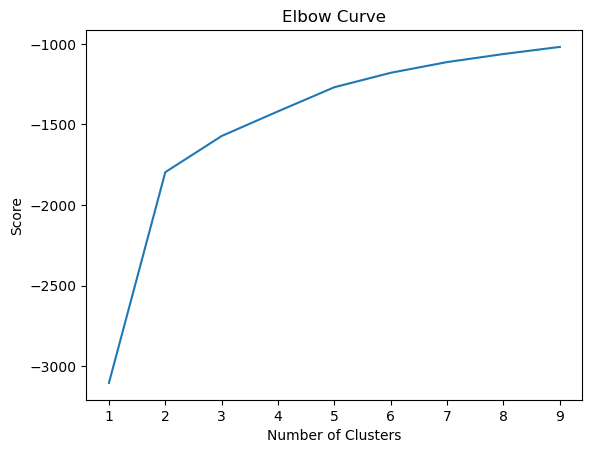

In [55]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#####  It seems that 2 is where the curve starts to decrease. 

### 3. k-means clustering

In [61]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 2) 


In [63]:
# Fit the k-means object to the data.

kmeans.fit(df_spotify_scaled)

C:\Users\gerar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [65]:
df_spotify_scaled['clusters'] = kmeans.fit_predict(df_spotify_scaled)

C:\Users\gerar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [66]:
df_spotify_scaled.sample(n=5)

,artists_num,album_num_tracks,peak_rank,weeks_on_chart,streams,danceability,energy,mode,loudness,acousticness,instrumentalness,valence,tempo,duration,clusters
3543,0.1,0.152542,0.296482,0.034314,0.069818,0.144910,0.547146,1.0,0.750195,0.585506,0.000044,0.416842,0.189802,0.366112,0
4536,0.1,0.093220,0.050251,0.024510,0.038257,0.851497,0.655707,0.0,0.739440,0.104613,0.000000,0.314737,0.255437,0.284418,1
2530,0.0,0.110169,0.080402,0.014706,0.055734,0.841916,0.489247,1.0,0.551495,0.092238,0.000228,0.047789,0.546007,0.322239,0
361,0.0,0.110169,0.326633,0.127451,0.008262,0.510180,0.769438,0.0,0.820698,0.028153,0.000002,0.214737,0.593202,0.328290,1
5212,0.1,0.050847,0.110553,0.000000,0.165984,0.720958,0.365178,0.0,0.675800,0.536209,0.000000,0.588421,0.503492,0.178517,1


In [69]:
df_spotify_scaled['clusters'].value_counts()

clusters
0    3077
1    2266
Name: count, dtype: int64

### Plots

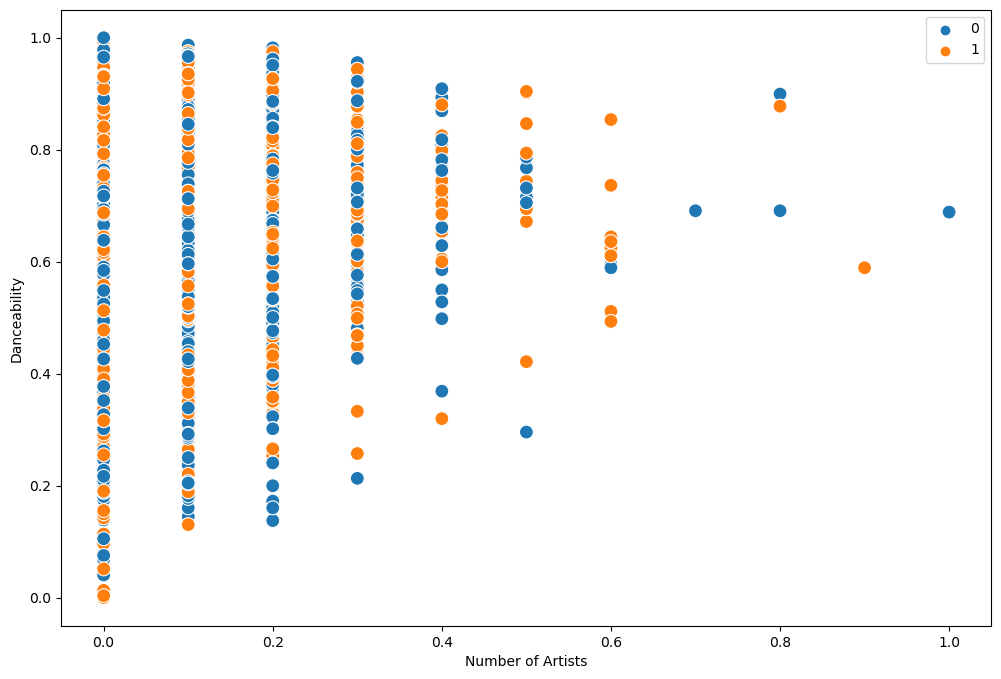

In [72]:
# Plot the clusters for duration and weeks on chart 

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_spotify_scaled['artists_num'], y=df_spotify_scaled['danceability'], hue=kmeans.labels_, s=100) 


ax.grid(False) # This removes the grid from the background.
plt.xlabel('Number of Artists') # Label x-axis.
plt.ylabel('Danceability') # Label y-axis.
plt.show()

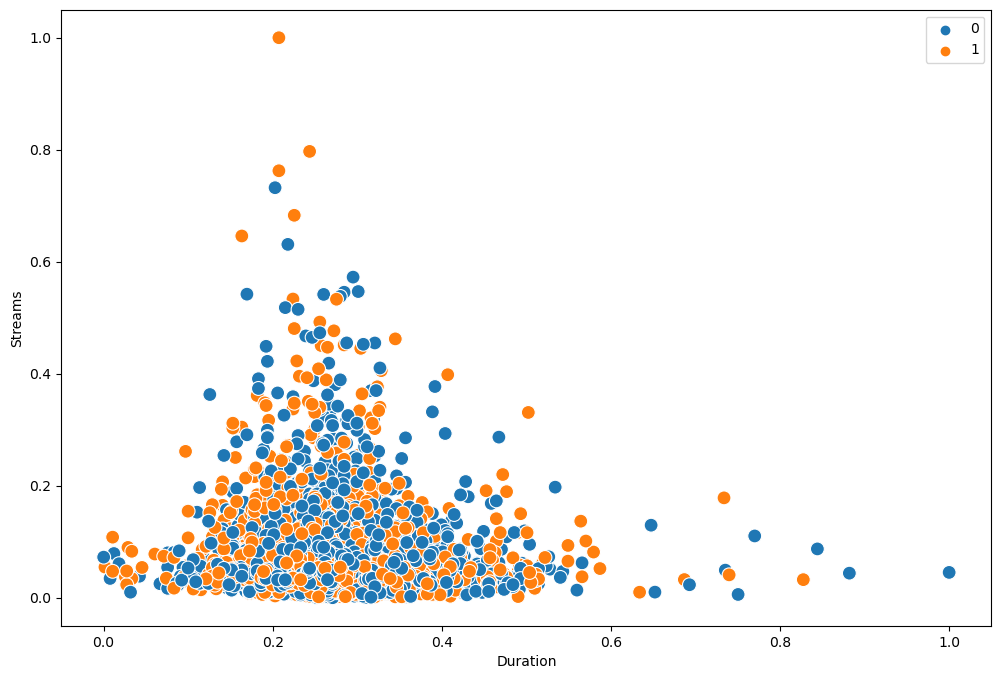

In [74]:
# Plot the clusters for duration and streams

plt.figure(figsize=(12,8))
ax_2 = sns.scatterplot(x=df_spotify_scaled['duration'], y=df_spotify_scaled['streams'], hue=kmeans.labels_, s=100) 


ax_2.grid(False) # This removes the grid from the background.
plt.xlabel('Duration') # Label x-axis.
plt.ylabel('Streams') # Label y-axis.
plt.show()

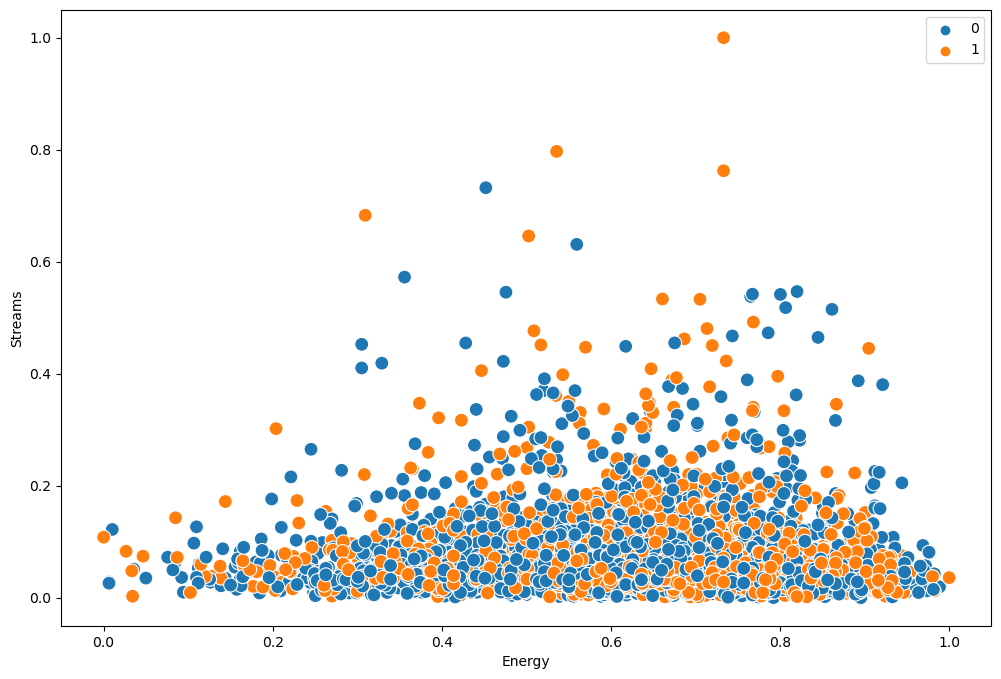

In [76]:
# Plot the clusters for energy and streams

plt.figure(figsize=(12,8))
ax_3 = sns.scatterplot(x=df_spotify_scaled['energy'], y=df_spotify_scaled['streams'], hue=kmeans.labels_, s=100) 


ax_3.grid(False) # This removes the grid from the background.
plt.xlabel('Energy') # Label x-axis.
plt.ylabel('Streams') # Label y-axis.
plt.show()

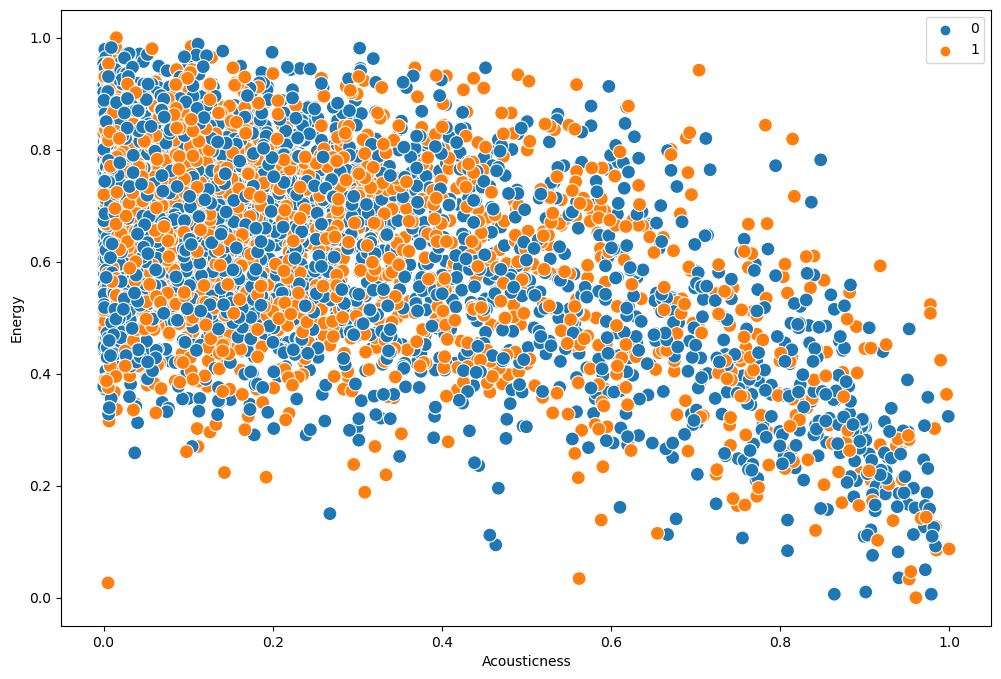

In [78]:
# Plot the clusters for acousticness and energy
plt.figure(figsize=(12,8))
ax_4 = sns.scatterplot(x=df_spotify_scaled['acousticness'], y=df_spotify_scaled['energy'], hue=kmeans.labels_, s=100) 


ax.grid(False) # This removes the grid from the background.
plt.xlabel('Acousticness') # Label x-axis.
plt.ylabel('Energy') # Label y-axis.
plt.show()

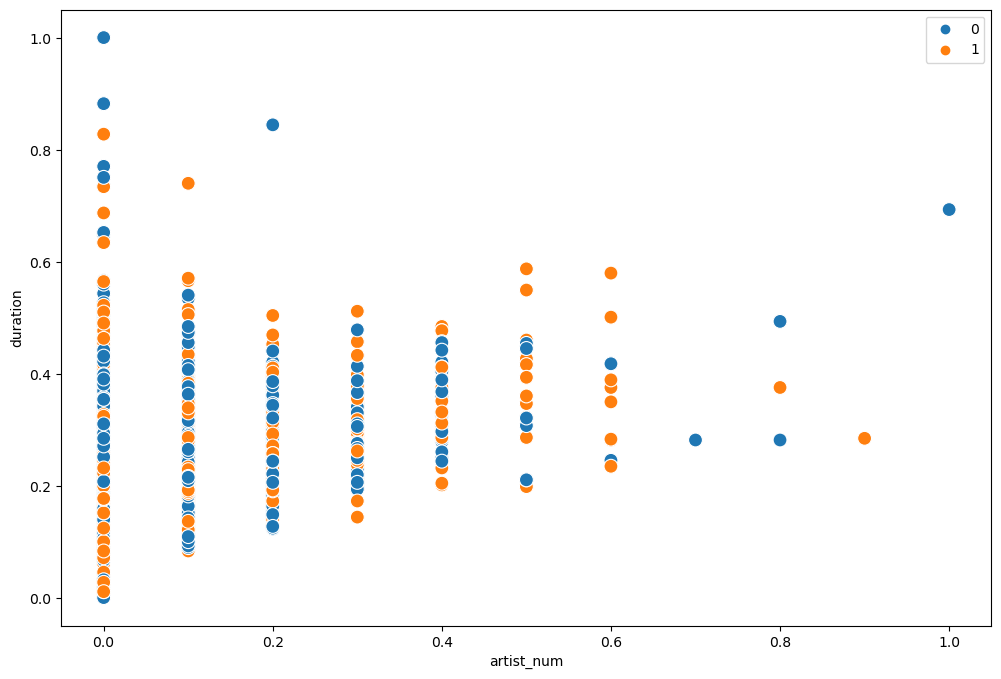

In [82]:

# Plot the clusters for duration

plt.figure(figsize=(12,8))
ax_4 = sns.scatterplot(x=df_spotify_scaled['artists_num'], y=df_spotify_scaled['duration'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('artist_num') # Label x-axis.
plt.ylabel('duration') # Label y-axis.
plt.show()

### Insights

There are 2 charts that show an interesting distribution of clusters. 

1. Duration vs. Streams
2. Energy vs. Streams 

On both of these charts the cluster 0 has a clear distinction from the other clusters. 


As of now I cannot make sense of the clustering or why these groups occur as they do





### Cluster descriptive statistics

In [ ]:
# Group by cluster
grouped = df_spotify_scaled.groupby('clusters')

# Calculate descriptive statistics
descriptive_stats = grouped.describe()
print(descriptive_stats)


I can't make sense of this data.